#**IPL Score Predictor**


---
**Name : Vishok Shukla, Roll No. : 19430MCA007, Paper : Machine Learning**

---




## **Data Gathering**

### **Importing Necessities**

In [1]:
import pandas as pd
import pickle

In [3]:
# loading dataset using read_csv()
df = pd.read_csv("/content/iplData.csv")
# displaying data
df.head(2)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222


## **EDA – Exploratory Data Analysis for IPL Score Predictor**

### **Checking Shape**

In [4]:
#checking shape of data using df.shape
df.shape

(76014, 15)

### **Check Data Type**

In [5]:
# getting data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


### **Check Null Values**

In [6]:
# check null values and then sum it up
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

### **Check Summary Statistics**

In [7]:
# Check summary stats using df.describe()
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


### **Check Areas For Each Numerical Feature**

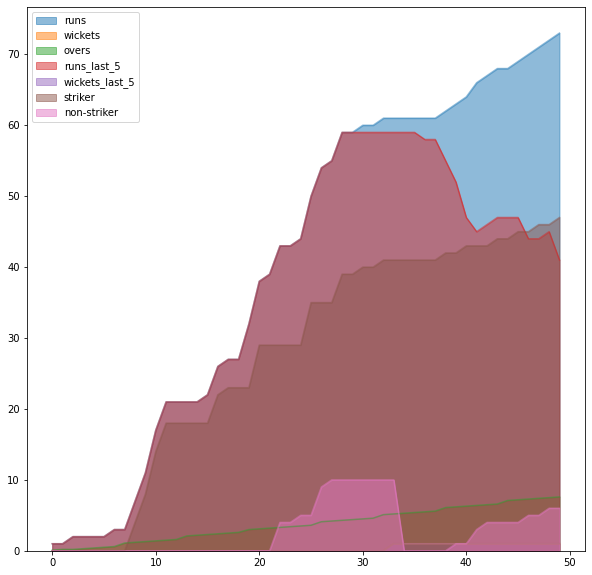

In [8]:
# plot area / contributions in dataset
df[['date','venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker']][:50].plot(kind = 'area', figsize = (10,10), stacked = False)

## **Data Cleaning for IPL Score Predictor**

### **Removing Irrelevant Columns**

In [9]:
# Removing unwanted cols - reduce memory size
cols_to_remove = ['mid' , 'venue' , 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=cols_to_remove , axis=1 , inplace = True)

In [10]:
#cross check
df.head(3)

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222


In [11]:
df.shape

(76014, 9)

### **Filtering Consistent Teams**

#### **Find Unique Teams**

In [12]:
# checking for how many batting teams are there
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

#### **Creating List**

In [13]:
# only keep current team which are present
consistent_team = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians','Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

#### **Filtering Consistent Teams**

In [14]:
# filtering based on consistency
df = df[(df['bat_team'].isin(consistent_team)) & (df['bowl_team'].isin(consistent_team))]

#### **Checking Results**

In [15]:
# printing out unique team after filtering
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


### **Filtering Based On 5 Overs**

**HYPOTHESIS**:- We can assume that “***In most of the matches the actual game starts after elapsing 5 overs***”, so it can serve as a good starting point for our training data.

In [17]:
# since for every match one can predict more accurately if one has 5 over data so,
# filtering based on 5 overs
df = df[df['overs']>=5.0]
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


### **Change Date Column Type**

In [18]:
# converting date cols from string to date time object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [19]:
df['date'].dtype

dtype('<M8[ns]')

## **Data Preparation for IPL Score Predictor**

### **Encoding Categorical Variables**

In [20]:
# converting categorical features using 'One Hot Encoding' # for numerical values
cat_df = pd.get_dummies(data = df, columns = ['bat_team' , 'bowl_team'])

In [21]:
cat_df.head(2)

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


### **Splitting Dataset**

In [22]:
# split the data into train and test set - based on date column
X_train = cat_df.drop(labels = 'total', axis = 1)[cat_df['date'].dt.year <= 2016]
X_test = cat_df.drop(labels = 'total', axis = 1) [cat_df['date'].dt.year >= 2017]

In [23]:
# since only one column so cosidered as series
y_train = cat_df[cat_df['date'].dt.year <= 2016]['total'].values
y_test = cat_df[cat_df['date'].dt.year >= 2017]['total'].values

In [24]:
#checking shape
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(37330, 22) (37330,)
(2778, 22) (2778,)


### **Dropping Date Column**

In [25]:
# since the requirement of our date column is over so we can drop it
# dropping date column
X_train.drop(labels = 'date', axis = True, inplace = True)
X_test.drop(labels = 'date', axis = True, inplace = True)

In [26]:
# use display to cross check in single line - only one
display("X_train", X_train.head(1))
display("X_test", X_test.head(1))

'X_train'

,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,61,0,5.1,59,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


'X_test'

,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
68894,46,1,5.1,42,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


## **Model Development for IPL Score Predictor**

### **Model Selection & Training**

#### **1. Importing Model**

In [27]:
# import module
from sklearn.linear_model import LinearRegression
reg = LinearRegression() #init

#### **2. Training Model**

In [28]:
# training model
reg.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## **Model Evaluation**

In [29]:
# getting predictions
prediction = reg.predict(X_test)

In [30]:
prediction

array([172.07093429, 175.2197967 , 174.61607874, ..., 100.37504751,
        99.80473879,  93.14382211])

### **1. Visualizing Results**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


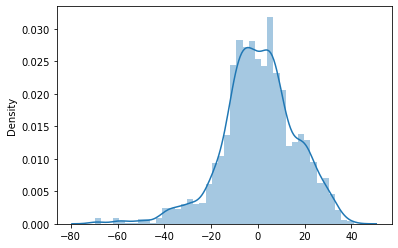

In [31]:
# plotting our fit
import seaborn as sns
sns.distplot(y_test-prediction)

### **2. Using Evaluation Metrics**

In [32]:
# checking for scores
from sklearn import metrics

In [33]:
# checking for scores

from sklearn import metrics

import numpy as np

# Mean Absolute Error

print('MAE: ', metrics.mean_absolute_error(y_test , prediction))

# Mean Squared Error

print('MSE: ', metrics.mean_squared_error(y_test, prediction))

# Root Mean Squared Error

print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE:  12.118617546193239
MSE:  251.00792310417282
RMSE:  15.843229566732056


## **Saving the IPL Score Predictor Model**

In [34]:
# creating our model pickel file - saving model
file_name = 'ipl_score_predict_model.pkl'
pickle.dump(reg , open(file_name,'wb'))